기술 통계

- Numerical descriptive statistics
- 데이터 변형,재구조화 Reshape
- 참고)Graphical descriptive statistics#2/2

In [5]:
#
import pandas as pd
타이타닉=pd.read_csv('../Datasets/titanic_train.csv')
타이타닉.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Numerical descriptive statistics

Aggregation 함수(min, max, sum, count 등) 사용

판다스는 기본적으로 결측값 NaN(Not a Number, None)을 제외하고 계산됨

## Measures of central tendency 중심 경향 척도-mean median mode

### - mean()
NaN을 제외한 평균

In [4]:
타이타닉.Age.mean()

29.69911764705882

In [77]:
타이타닉.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  color        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [29]:
타이타닉_num = 타이타닉.select_dtypes(include='number')

In [79]:
타이타닉_num.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

### - median()
NaN을 제외한 중앙값

In [80]:
타이타닉.Age.median()

28.0

### - mode()
NaN을 제외한 최빈값

In [81]:
타이타닉.Age.mode()

0    24.0
Name: Age, dtype: float64

In [82]:
타이타닉.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [83]:
타이타닉.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [84]:
타이타닉.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## Measures of variability/dispersion 변동성 척도-분산 표편 사분위수 변동계수

In [85]:
# 타이타닉=pd.read_csv('../Datasets/titanic_train.csv')

### var()
NaN을 제외한 분산

In [86]:
타이타닉.Age.var()

211.01912474630802

### std()
NaN을 제외한 표준 편차

In [87]:
타이타닉.Age.std()

14.526497332334042

### quantile() 백분위수

NaN을 제외한 표준 편차

q. 타이타닉의 Age의 85백분위수는?

In [88]:
타이타닉.Age.quantile(0.85)

45.0

- 참고) 사용자 정의함수

In [89]:
#
def calculate_quantile(data, q):
    sorted_data = sorted(data.dropna())  # 데이터를 리스트로 정렬합니다.
    index = (len(sorted_data) - 1) * q  # 분위수에 해당하는 인덱스를 계산합니다. #7.6499 파이썬은 0부터 시작
    floor = int(index // 1)  # 분위수에 해당하는 인덱스의 정수 부분을 가져옵니다. #7
    ceil = int(index // 1 + 1)  # 분위수에 해당하는 인덱스의 올림 값을 가져옵니다. #8
    fraction = index % 1  # 분위수에 해당하는 인덱스의 소수 부분을 가져옵니다. #0.649
    
    if floor == ceil:  # 분위수에 해당하는 인덱스가 정수인 경우
        quantile_value = sorted_data[floor]
    else:  # 분위수에 해당하는 인덱스가 정수가 아닌 경우
        quantile_value = sorted_data[floor] + (sorted_data[ceil]-sorted_data[floor])*fraction

    return quantile_value

In [90]:
calculate_quantile(타이타닉.Age, 0.85)

45.0

- 대략적으로 구하기

In [91]:
import pandas as pd

In [92]:
#
t=pd.Series([4]*10+[1]*20+[3]*20+[10]*40).sort_values()
print(list(pd.Series([4]*10+[1]*20+[3]*20+[10]*40).sort_values()))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [93]:
len(t)*0.85

76.5

In [94]:
t.iloc[76]

10

In [95]:
t.quantile(0.85)

10.0

> 데이터가 많아지면 앞뒤로 다 같은 숫자일 확률이 무지 높다. 이걸 이용해보자

q. 타이타닉의 Age의 85백분위수는? quantile함수을 잊어버렸다고 가정하고 빨리 풀어보자

In [96]:
s_age_sort=타이타닉.Age.dropna().sort_values()

In [97]:
(len(s_age_sort))*0.85

606.9

In [98]:
s_age_sort.iloc[606]

45.0

In [99]:
타이타닉.Age.quantile(0.85)

45.0

# datasets 13 - 2

## Q2 두번째 조건까지만 풀어봅시다

In [100]:
df = pd.read_csv('../Datasets/Dataset_13_train.csv')

In [101]:
df.major_discipline.unique()

array(['STEM', 'Business Degree', 'Arts', 'Humanities', 'Other'],
      dtype=object)

In [102]:
df = df[df.major_discipline=='STEM']

In [103]:
df['city_development_index'].quantile(0.85)

0.92

In [104]:
df2=df[df.city_development_index>df['city_development_index'].quantile(0.85)]

In [105]:
df2.shape

(145, 10)

In [106]:
#꼼수사용
len(df.city_development_index.dropna())*0.85
my_q=df.city_development_index.sort_values().iloc[1095]
my_q

0.92

## Measure of association 연관성 척도- 공분산 상관계수

### cov()

In [107]:
타이타닉[['Age','Fare']].cov()

Age         Fare
Age   211.019125    73.849030
Fare   73.849030  2469.436846

In [108]:
타이타닉_num.cov()

PassengerId  Survived     Pclass         Age      SibSp  \
PassengerId  66231.000000 -0.626966  -7.561798  138.696504 -16.325843   
Survived        -0.626966  0.236772  -0.137703   -0.551296  -0.018954   
Pclass          -7.561798 -0.137703   0.699015   -4.496004   0.076599   
Age            138.696504 -0.551296  -4.496004  211.019125  -4.163334   
SibSp          -16.325843 -0.018954   0.076599   -4.163334   1.216043   
Parch           -0.342697  0.032017   0.012429   -2.344191   0.368739   
Fare           161.883369  6.221787 -22.830196   73.849030   8.748734   

                Parch         Fare  
PassengerId -0.342697   161.883369  
Survived     0.032017     6.221787  
Pclass       0.012429   -22.830196  
Age         -2.344191    73.849030  
SibSp        0.368739     8.748734  
Parch        0.649728     8.661052  
Fare         8.661052  2469.436846

### corr()
- NaN을 제외한 상관계수
- 피어슨(Pearson) 상관계수

In [109]:
타이타닉_num.corr()
# 타이타닉.corr() 안됨

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

q. 타이타닉 데이터에서 생존여부에 대한 상관분석을 하시오. 가장 큰 상관관계를 가진 변수는?

In [33]:
타이타닉_num.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [42]:
타이타닉_num.corr()['Survived'].drop('Survived').abs().idxmax()

'Pclass'

a. Pclass

## Measures of Shape 모양 척도 - 왜도 첨도

q. 타이타닉의 Fare의 왜도 값을 쓰세요

### skew()
왜도

In [110]:
타이타닉['Fare'].skew()

4.787316519674893

In [111]:
타이타닉_num.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

### kurt()
첨도

In [112]:
타이타닉['Fare'].kurt()

33.39814088089868

In [113]:
타이타닉_num.kurt()

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

## 데이터 요약

In [114]:
#
타이타닉=pd.read_csv('../Datasets/titanic_train.csv')
타이타닉.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

### - sum
NaN을 제외한 합

In [115]:
타이타닉.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [116]:
(타이타닉.Embarked=='S').sum(axis=0)
# (타이타닉.Embarked=='S').sum(axis=1) 시리즈라 axis사실 필요없음 1로 하면 에러

644

In [117]:
타이타닉[['SibSp','Parch']]

SibSp  Parch
0        1      0
1        1      0
2        0      0
3        1      0
4        0      0
..     ...    ...
886      0      0
887      0      0
888      1      2
889      0      0
890      0      0

[891 rows x 2 columns]

In [118]:
타이타닉[['SibSp','Parch']].sum(axis=0)

SibSp    466
Parch    340
dtype: int64

In [119]:
타이타닉[['SibSp','Parch']].sum(axis=1)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

q. 타이타닉[['SibSp','Parch']]에서 element가 1인 데이터를 축에 따라 합을 각각 구해보아라

In [120]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==1).sum(axis=0)

SibSp    209
Parch    118
dtype: int64

In [121]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==1).sum(axis=0)
# 타이타닉[['SibSp','Parch']].applymap(lambda x: x==1).sum(axis=0)

SibSp    209
Parch    118
dtype: int64

In [122]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==1).sum(axis=1)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Length: 891, dtype: int64

Q.
SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수  
Parch : 동반한 Parent(부모) Child(자식)의 수  
두 변수 중에 하나라도 동반자가 없는 유람선 승객수는?
ex) SibSp=0 Parch=1 -> 카운트 1

In [123]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==0)

SibSp  Parch
0    False   True
1    False   True
2     True   True
3    False   True
4     True   True
..     ...    ...
886   True   True
887   True   True
888  False  False
889   True   True
890   True   True

[891 rows x 2 columns]

In [124]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==0).sum(axis=1)

0      1
1      1
2      2
3      1
4      2
      ..
886    2
887    2
888    0
889    2
890    2
Length: 891, dtype: int64

In [125]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==0).sum(axis=1)>0

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

In [126]:
(타이타닉[['SibSp','Parch']].apply(lambda x: x==0).sum(axis=1)>0).sum()

749

Q. 남자 중 생존한 확률을 소수 둘째자리까지 표시하라(소수 셋째자리에서 반올림), crosstab,len 사용하지 말고 sum을 이용해서 구하라

In [127]:
#
타이타닉_생존=pd.crosstab(타이타닉.Sex, 타이타닉.Survived, normalize='index')
타이타닉_생존.plot.barh(stacked=True)

<Axes: ylabel='Sex'>

In [128]:
#
len(타이타닉[타이타닉.Sex=='male'])
# 타이타닉[타이타닉.Sex=='male'].shape[0]

577

In [129]:
(타이타닉.Sex=='male').sum()

577

In [130]:
male_1=((타이타닉.Sex=='male')&(타이타닉.Survived==1)).sum(axis=0)

In [131]:
남자생존확률=male_1/(타이타닉.Sex=='male').sum()

In [132]:
남자생존확률.round(2)

0.19

In [133]:
# len으로 푸는 법
# len(타이타닉.loc[(타이타닉.Sex=='male')&(타이타닉.Survived==1)])/len(타이타닉.loc[타이타닉.Sex=='male'])

### - count()
NaN 값을 제외한 원소의 개수 

In [134]:
타이타닉.shape

(891, 12)

In [135]:
타이타닉.Cabin.count()

204

q. count,info 함수를 사용하지 않고 Cabin의 결측치가 제외된 행의 수인 204가 나오게 하시오. 5m

In [136]:
타이타닉.Cabin.isna()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [137]:
n_na = 타이타닉.Cabin.isna().sum(axis=0)

In [138]:
n_na

687

In [139]:
타이타닉.shape[0] - n_na

204

In [140]:
(~타이타닉.Cabin.isna()).sum(axis=0)

204

## 그룹 함수 groupby

- 평균

In [141]:
타이타닉.groupby(by='Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

- 여러 변수

In [142]:
타이타닉.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S

In [143]:
타이타닉.groupby('Sex')[['Survived','Age','Fare']].mean()

Survived        Age       Fare
Sex                                   
female  0.742038  27.915709  44.479818
male    0.188908  30.726645  25.523893

> 여러 컬럼에 적용할 때는 리스트 형태로 넣어줘야 함

- 분산

In [144]:
타이타닉.groupby(by='Sex')['Age'].var()

Sex
female    199.096233
male      215.449579
Name: Age, dtype: float64

q. 호불호가 극명하게 나뉘는 영화를 찾아보자.  3m

In [145]:
# import pandas as pd

In [23]:
#
영화 = pd.DataFrame(
    {'title' : ['인터스텔라', '인터스텔라', '인터스텔라', '반지의제왕','반지의제왕','반지의제왕','반지의제왕'],
    'rating': [60, 80, 40, 100, 90, 80, 90]})
영화

title  rating
0  인터스텔라      60
1  인터스텔라      80
2  인터스텔라      40
3  반지의제왕     100
4  반지의제왕      90
5  반지의제왕      80
6  반지의제왕      90

In [24]:
영화.groupby(by='title')['rating'].std()

title
반지의제왕     8.164966
인터스텔라    20.000000
Name: rating, dtype: float64

### a. 인터스텔라    

- 그룹바이에 함수 적용

q. title기준으로 그룹을 지정한 후 각 그룹내의 개수를 구하라. hint: 영화.groupby('title').apply(함수)

In [27]:
영화.groupby('title').apply(lambda x : len(x))

title
반지의제왕    4
인터스텔라    3
dtype: int64

## q. Dataset 6-1 groupby로 풀어보시오

In [148]:
# import pandas as pd

In [149]:
#
df= pd.read_csv('../Datasets/Dataset_06.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  2597000006  20150309T000000  347500.0         3       1.50         1180   
1  8813400345  20150414T000000  575000.0         2       1.00          980   
2   226059106  20150102T000000  489500.0         3       1.75         2090   
3  8645500270  20141028T000000  246000.0         4       1.75         1720   
4  7010700550  20141114T000000  595000.0         3       2.50         2030   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8353     1.0           0     0          3      7        1180   
1      3663     1.0           0     0          5      7         980   
2     65558     1.0           0     0          3      8        1330   
3      7455     1.0           0     0          4      7        1020   
4      5100     2.0           0     0          3      7        2030   

   sqft_basement  yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  
0              0      1960             0    98155           1710        8748  
1              0      1909             0    98105           1620        3706  
2            760      1977             0    98072           2450       47178  
3            700      1963             0    98058           1720        7700  
4              0      2008             0    98199           1790        4380

In [150]:
#기존 방법
print(df.waterfront.unique())
group0 = df[df.waterfront==0]['price'].mean()
group1 = df[df.waterfront==1]['price'].mean()
print(int(abs(group1-group0)))

[0 1]
1167272


In [151]:
#다른 방법 groupby
df_group=df.groupby('waterfront')['price'].mean()

In [152]:
int(abs(df_group[0]-df_group[1]))

1167272

In [153]:
#다른 답
# int(df.groupby('waterfront')['price'].mean().abs().diff()[1])

In [154]:
# 정답: 1167272

## q. Dataset 04 - 1번

In [155]:
df = pd.read_csv('../Datasets/Dataset_04.csv')
df.head()

LOCATION SUBJECT  TIME      Value
0      AUS    BEEF  1991  27.721815
1      AUS    BEEF  1992  26.199591
2      AUS    BEEF  1993  26.169094
3      AUS    BEEF  1994  25.456134
4      AUS    BEEF  1995  25.340226

In [156]:
df = df[df.LOCATION=='KOR']

In [157]:
time_groupby=df.groupby('TIME')['Value'].sum()

In [158]:
time_groupby

TIME
1990     5.774255
1991    21.911207
1992    26.901769
1993    26.938255
1994    27.877341
1995    30.042035
1996    31.928922
1997    32.002991
1998    30.009057
1999    35.383138
2000    34.957160
2001    35.336550
2002    37.162442
2003    39.471677
2004    35.171424
2005    36.617273
2006    41.910995
2007    43.690430
2008    43.941183
2009    43.336372
2010    46.412261
2011    46.799325
2012    46.128025
2013    49.496899
2014    53.274723
2015    55.254123
2016    55.665778
2017    55.885227
2018    56.146592
2019    56.394942
2020    56.643664
2021    56.900853
2022    57.194312
2023    57.491758
2024    57.781372
2025    58.083483
2026    58.392009
Name: Value, dtype: float64

In [159]:
time_groupby.reset_index()

TIME      Value
0   1990   5.774255
1   1991  21.911207
2   1992  26.901769
3   1993  26.938255
4   1994  27.877341
5   1995  30.042035
6   1996  31.928922
7   1997  32.002991
8   1998  30.009057
9   1999  35.383138
10  2000  34.957160
11  2001  35.336550
12  2002  37.162442
13  2003  39.471677
14  2004  35.171424
15  2005  36.617273
16  2006  41.910995
17  2007  43.690430
18  2008  43.941183
19  2009  43.336372
20  2010  46.412261
21  2011  46.799325
22  2012  46.128025
23  2013  49.496899
24  2014  53.274723
25  2015  55.254123
26  2016  55.665778
27  2017  55.885227
28  2018  56.146592
29  2019  56.394942
30  2020  56.643664
31  2021  56.900853
32  2022  57.194312
33  2023  57.491758
34  2024  57.781372
35  2025  58.083483
36  2026  58.392009

In [160]:
time_groupby.reset_index().corr()

TIME     Value
TIME   1.000000  0.960124
Value  0.960124  1.000000

In [161]:
time_groupby.reset_index().corr().iloc[0,1].round(3)

0.96

## q. DataSet_08 -1

In [163]:
import pandas as pd

In [164]:
df = pd.read_csv('../Datasets/Dataset_08.csv')
df.head(2)

RandD_Spend  Administration  Marketing_Spend       State     Profit
0     165349.2       136897.80        471784.10    New York  192261.83
1     162597.7       151377.59        443898.53  California  191792.06

In [165]:
df['State'].value_counts(normalize=True).sort_index().values

array([0.34, 0.32, 0.34])

In [166]:
# 다른 방법
df.groupby('State').apply(lambda x : len(x))

State
California    17
Florida       16
New York      17
dtype: int64

In [167]:
df.groupby('State').apply(len)

State
California    17
Florida       16
New York      17
dtype: int64

In [168]:
df.groupby('State').apply(len) / len(df)

State
California    0.34
Florida       0.32
New York      0.34
dtype: float64

In [169]:
# 정답: 0.34, 0.32, 0.34

# 데이터 변형,재구조화 Reshape

## 피벗

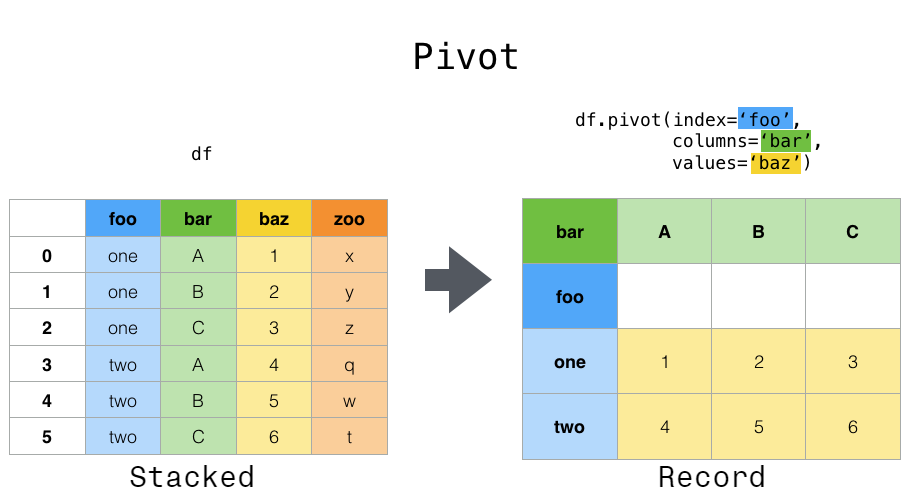

- `index` : 피봇테이블에서 index 로 설정할 컬럼명
- `columns` : 피봇테이블에서 colum 으로 설정할 컬럼명
- `values` : 데이터를 구성하는 값

In [170]:
#
data = {
    "value": range(12),
       "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
       "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}

df = pd.DataFrame(data)
df.head()

value variable       date
0      0        A 2020-01-03
1      1        A 2020-01-04
2      2        A 2020-01-05
3      3        B 2020-01-03
4      4        B 2020-01-04

In [171]:
df.pivot(index="date", columns="variable", values="value")

variable    A  B  C   D
date                   
2020-01-03  0  3  6   9
2020-01-04  1  4  7  10
2020-01-05  2  5  8  11

- 똑같은 데이터가 여러개 있으면 에러발생  
ValueError: Index contains duplicate entries, cannot reshape

# datasets 11 - 2번

In [172]:
# df = pd.read_csv("world_happiness_score.csv")
df = pd.read_csv("../Datasets/Dataset_11.csv")
df.head(2)

Country  Happiness_Rank  Happiness_Score  year
0  Switzerland               1            7.587  2015
1      Iceland               2            7.561  2015

In [173]:
df_wide = df.pivot(index = "Country", columns = "year", values = "Happiness_Score")
df_wide

year          2015   2016   2017
Country                         
Afghanistan  3.575  3.360  3.794
Albania      4.959  4.655  4.644
Algeria      5.605  6.355  5.872
Angola       4.033  3.866  3.795
Argentina    6.574  6.650  6.599
...            ...    ...    ...
Venezuela    6.810  6.084  5.250
Vietnam      5.360  5.061  5.074
Yemen        4.077  3.724  3.593
Zambia       5.129  4.795  4.514
Zimbabwe     4.610  4.193  3.875

[166 rows x 3 columns]

In [174]:
df_wide["IR"] = (df_wide[2017] - df_wide[2015]) / 2

> 주의) 컬럼명 "2017" -> 2017로 가져와야 함

In [175]:
df_wide.sort_values('IR', ascending=False)[:3].index

Index(['Latvia', 'Romania', 'Togo'], dtype='object', name='Country')

## 피벗 테이블

피벗 vs. 피벗 테이블
--> pivot_table 은 agg(aggregate,집합) function 사용가능

- `values` : 데이터를 구성하는 값
- `index` : 피봇테이블에서 index 로 설정할 컬럼명
- `columns` : 피봇테이블에서 colum 으로 설정할 컬럼명
- `aggfunc` : 연산 기능
- 파라미터가 안들어가도 됨 columns=None

In [176]:
#
import numpy as np

df = pd.DataFrame(
    {
        "group": ["one", "one", "one", "two", "two", "three"] ,
        "sex": ["m", "f", "f", "m", "f", "f"] ,
        "D": np.arange(6),        
    }
)
df

group sex  D
0    one   m  0
1    one   f  1
2    one   f  2
3    two   m  3
4    two   f  4
5  three   f  5

>  group one, sex f 예를 보자 해당 케이스의 데이터가 1,2

In [177]:
df.pivot_table(values="D", index="group", columns="sex", aggfunc='sum')

sex      f    m
group          
one    3.0  0.0
three  5.0  NaN
two    4.0  3.0

In [178]:
df.pivot_table(values="D", index="group", columns="sex", aggfunc='mean')

sex      f    m
group          
one    1.5  0.0
three  5.0  NaN
two    4.0  3.0

## q.Dataset 04 - 1번

q. 앞에서 그룹바이로 풀었던 문제를 피벗 테이블을 이용해서 풀어보세요.

In [10]:
#
df = pd.read_csv('../Datasets/Dataset_04.csv')
df = df[df.LOCATION=='KOR']
df.head()

LOCATION SUBJECT  TIME     Value
442      KOR    BEEF  1991  5.085481
443      KOR    BEEF  1992  5.685434
444      KOR    BEEF  1993  5.325765
445      KOR    BEEF  1994  5.698819
446      KOR    BEEF  1995  6.568429

In [11]:
#
#기존 그룹바이 방법
time_groupby=df.groupby('TIME')['Value'].sum()
time_groupby.head()

TIME
1990     5.774255
1991    21.911207
1992    26.901769
1993    26.938255
1994    27.877341
Name: Value, dtype: float64

In [15]:
time_pivot=df.pivot_table(index='TIME',
                        values='Value'
                        ,aggfunc='sum')

In [16]:
time_pivot.head(3)

Value
TIME           
1990   5.774255
1991  21.911207
1992  26.901769

In [18]:
time_pivot.reset_index().head(2)

TIME      Value
0  1990   5.774255
1  1991  21.911207

In [19]:
time_corr=time_pivot.reset_index().corr()

In [20]:
time_corr

TIME     Value
TIME   1.000000  0.960124
Value  0.960124  1.000000

In [21]:
time_corr.loc['TIME', 'Value'].round(2)

0.96

In [22]:
time_corr.iloc[0,1].round(2)

0.96

# 참고)Graphical descriptive statistics#2/2

## 이상치

In [ ]:
#
점수 = pd.DataFrame(
    {'math' : [55, 73, 100, 90, 85, 62,150]})

In [ ]:
점수

In [ ]:
점수.describe()

In [ ]:
타이타닉.describe()

## 박스 플랏

### plot.box()

In [183]:
점수.plot.box();

NameError: name '점수' is not defined

q. 타이타닉 데이터에서 Fare에서 극명하게 이상치로 보이는 행들을 탐색하시오 3m

<Axes: >

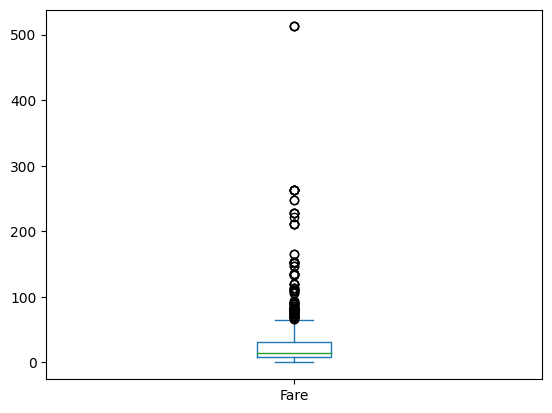

In [184]:
타이타닉['Fare'].plot.box()

In [185]:
타이타닉[타이타닉.Fare > 400]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C